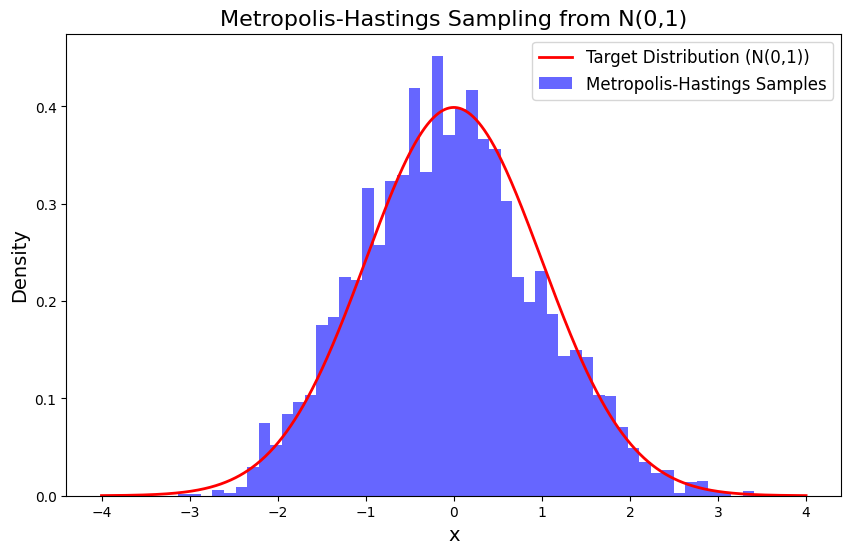

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def target_distribution(x):
    return np.exp(-0.5 * x**2) / np.sqrt(2 * np.pi)

def proposal_distribution(x):
    return np.random.normal(loc=x, scale=1.0)

def metropolis_hastings(target_dist, proposal_dist, initial_state, num_samples):
    samples = [initial_state] 
    current_state = initial_state  
    
    for i in range(num_samples - 1):
        proposed_state = proposal_dist(current_state)
        
        acceptance_prob = min(1, target_dist(proposed_state) / target_dist(current_state))
        
        if np.random.rand() < acceptance_prob:
            current_state = proposed_state
        
        samples.append(current_state)
    
    return np.array(samples)

initial_state = 0 
num_samples = 5000  

samples = metropolis_hastings(target_distribution, proposal_distribution, initial_state, num_samples)

x = np.linspace(-4, 4, 1000)
plt.figure(figsize=(10, 6))

plt.plot(x, target_distribution(x), label='Target Distribution (N(0,1))', color='red', lw=2)

plt.hist(samples, bins=50, density=True, alpha=0.6, label='Metropolis-Hastings Samples', color='blue')

plt.title('Metropolis-Hastings Sampling from N(0,1)', fontsize=16)
plt.xlabel('x', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend(fontsize=12)

plt.show()

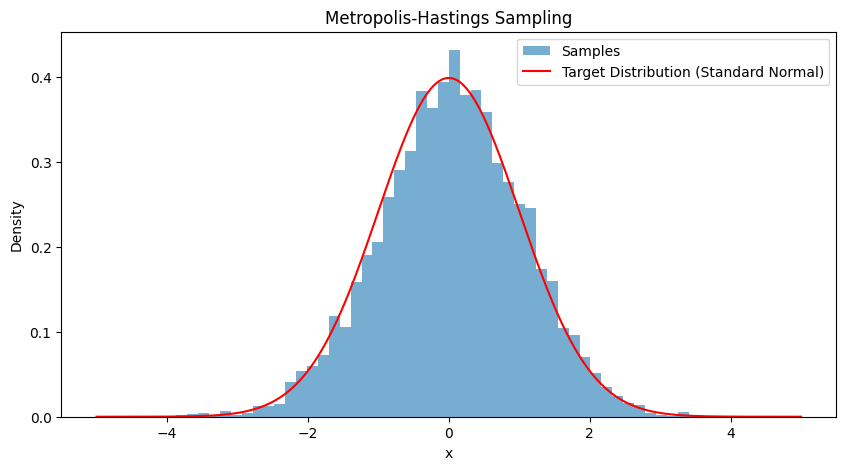

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def target_distribution(x):
    return np.exp(-0.5 * x**2)  

def proposal_distribution(x, proposal_std):
    return np.random.normal(x, proposal_std)

def metropolis_hastings(target_distribution, proposal_distribution, num_samples, proposal_std, initial_sample):
    samples = [initial_sample] 
    current_sample = initial_sample

    for _ in range(num_samples - 1):
        proposed_sample = proposal_distribution(current_sample, proposal_std)
        
        acceptance_prob = min(1, target_distribution(proposed_sample) / target_distribution(current_sample))
        
        if np.random.rand() < acceptance_prob:
            current_sample = proposed_sample
        
        samples.append(current_sample)

    return np.array(samples)

num_samples = 10000  
initial_sample = 0  
proposal_std = 1.0

samples = metropolis_hastings(target_distribution, proposal_distribution, num_samples, proposal_std, initial_sample)

plt.figure(figsize=(10,5))
plt.hist(samples, bins=50, density=True, alpha=0.6, label='Samples')
x = np.linspace(-5, 5, 1000)
plt.plot(x, np.exp(-0.5 * x**2) / np.sqrt(2 * np.pi), label='Target Distribution (Standard Normal)', color='red')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.title('Metropolis-Hastings Sampling')
plt.show()